# Data Quanlity Report 

This Notebook contains results & analysis of the quality of data for adresses in the  'addresses_20191029' dataset .

__________________

In [1]:
import pandas as pd
import numpy as np
import missingno as mgno
import matplotlib.pyplot as plt

In [4]:
# Importing data from BigQuery 
query = 'SELECT * FROM [bcx-insights.bcx_networkhealth.addresses_20191029]'
df = pd.read_gbq(query, project_id = 'bcx-insights')

C:\Users\SheZ Basha\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value for dialect is changing to "standard" in a future version of pandas-gbq. Pass in dialect="legacy" to disable this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=725825577420-unm2gnkiprugilg743tkbig250f4sfsj.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fbigquery&state=ewqqGaMgcDLRBRxrbOGx4MQYerb4ho&prompt=consent&access_type=offline
Enter the authorization code: 4/tQHCi2FuY7rdLW8eXP_fsPbL4_nljAPuQKM5SDUxoI0agqViSMzLpVo


## Data Accuracy 

### Random Sample 

In [13]:
df.sample(n=10)

,ENTITYID,STREETBOX,SUBURBCITY,POSTALCODE,CAREOF,BUILDING,FLOOR,ROOM,LATITUDE,LONGITUDE,PROVINCE
1385,368647,14th Avenue & Hendrik Potgieter,"Constantia, Roodepoort",1734,None,14th Avenue District(Roodepoort Hyperama),None,Shop 24B,None,None,None
12901,470981,"19, Newmarket Road","Hoogland x22, Randburg",2194,None,None,None,None,None,None,Gauteng
658,229271,Cnr R40 Main Road & Rotsvy Street,Hoedspruit - Limpopo,None,None,Hoedspruit Shopping Centre,None,shop 19B,None,None,None
7652,467669,2478 Thames Drive,"Three Rivers, Vereeniging",None,None,"Server Room, Pick N Pay Centre ,Absa Three Rivers",None,None,None,None,Gauteng
20614,474277,3C Porterfield Road,Table View,7441,None,Cafe De ville,None,None,None,None,Western Cape
9080,311125,P.O Box 14538,"Hatfield,Pretoria",0028,None,None,None,None,None,None,Gauteng
13489,465540,None,Hoedspruit,1380,None,Pick N Pay Centre,None,Shop No 7,None,None,Limpopo
8919,464785,390 Braam Pretorius Street,"Wonderboom Poort, Pretoria",0001,None,None,None,None,None,None,Gauteng
7948,469357,"Cnr Westlake and Hartley, 123 Westlake Avenue","Silverton, Pretoria",0184,None,VGM Building,None,None,None,None,Gauteng
17281,433255,"9105, PIlane Road",Ga Rankuwa Zone 1,0208,None,None,None,None,None,None,North West


#### Columns & data types 

In [8]:
columns = pd.DataFrame(list(df.columns.values))
data_types = pd.DataFrame(df.dtypes,
                          columns=['Data Type'])
data_types

,Data Type
ENTITYID,int64
STREETBOX,object
SUBURBCITY,object
POSTALCODE,object
CAREOF,object
BUILDING,object
FLOOR,object
ROOM,object
LATITUDE,object
LONGITUDE,object


##### Duplications

In [15]:
df.duplicated().sum()

0

#### Row Analysis 

In [20]:
data = {'Info':['total_Rows', 'row_w_ANY_NaNs', 'row_w_ALL_NaNs', 
                    'total_duplicate_rows', 'total_unique_rows'], 
            'Count':[len(df), df.isnull().any(axis=1).sum(), df.isnull().all(1).sum(), 
                     df.duplicated(keep='first').sum(), len(df.drop_duplicates())]}
row_anlysis = pd.DataFrame(data) 

row_anlysis

,Info,Count
0,total_Rows,26534
1,row_w_ANY_NaNs,26534
2,row_w_ALL_NaNs,0
3,total_duplicate_rows,0
4,total_unique_rows,26534


#### Missing Values 

In [23]:
df.replace('None', np.nan, inplace=True)

In [31]:
missing_data_counts = pd.DataFrame(df.isnull().sum(),
                                   columns=['Missing Values'])
missing_data_counts

,Missing Values
ENTITYID,0
STREETBOX,585
SUBURBCITY,370
POSTALCODE,8302
CAREOF,26321
BUILDING,16687
FLOOR,25799
ROOM,19468
LATITUDE,26047
LONGITUDE,26045


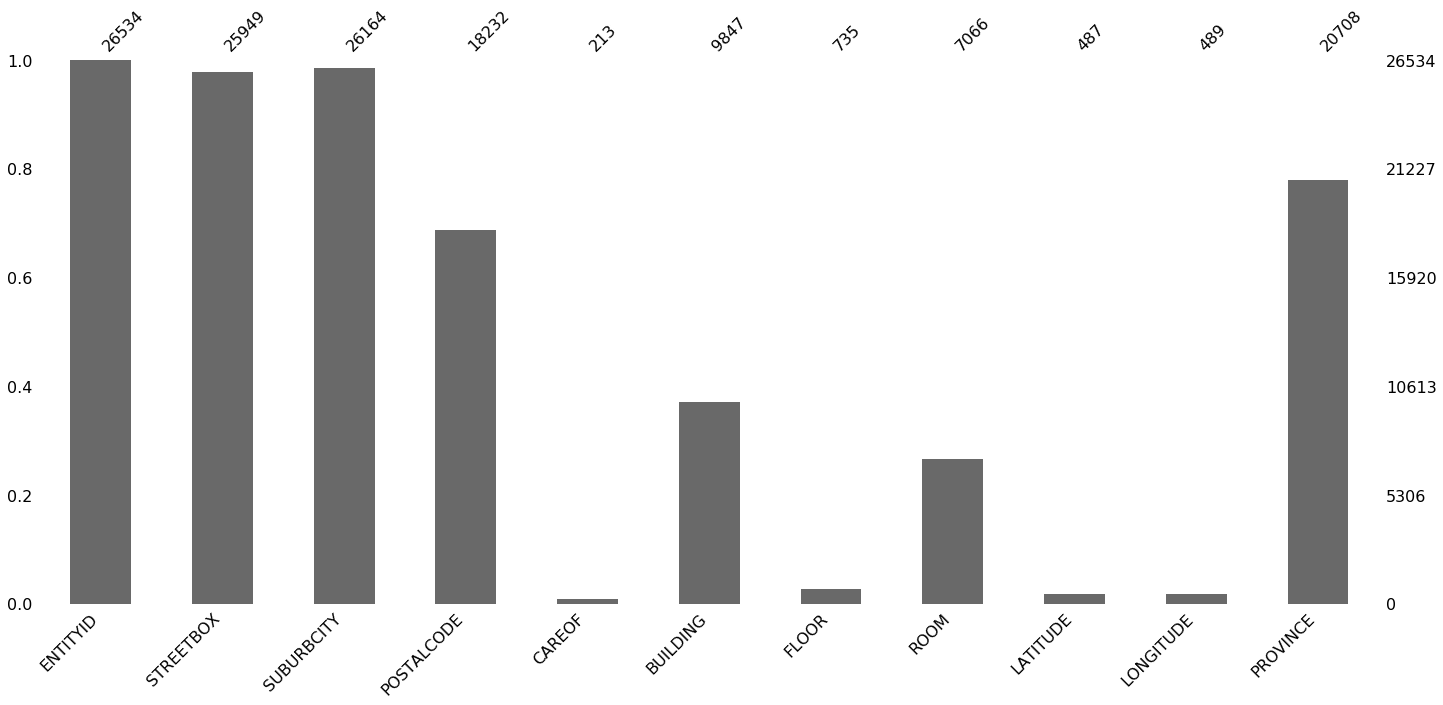

In [32]:
mgno.bar(df)

In [38]:
missing_percentage = pd.DataFrame((df.isnull().sum()  /len(df)*100).round(2), columns=['Null %'])
missing_percentage

,Null %
ENTITYID,0.00
STREETBOX,2.20
SUBURBCITY,1.39
POSTALCODE,31.29
CAREOF,99.20
BUILDING,62.89
FLOOR,97.23
ROOM,73.37
LATITUDE,98.16
LONGITUDE,98.16


### Summary Statistics 

In [39]:
df.describe(include=['object'])

,STREETBOX,SUBURBCITY,POSTALCODE,CAREOF,BUILDING,FLOOR,ROOM,LATITUDE,LONGITUDE,PROVINCE
count,25949,26164,18232,213,9847,735,7066,487,489,20708
unique,21444,10104,1989,164,6799,179,2907,462,464,9
top,P O Box 36,Johannesburg,2000,pro pos,Shoprite Centre,Ground Floor,Shop 1,-31.589411,28.786251,Gauteng
freq,194,442,407,23,40,212,261,5,5,7391


In [43]:
#create categorical dataset
categoricalDataset = df.loc[:, df.dtypes == np.object]
#List of features that are in the categorical dataset
catList = list(df.loc[:, df.dtypes == np.object])
print(catList)


['STREETBOX', 'SUBURBCITY', 'POSTALCODE', 'CAREOF', 'BUILDING', 'FLOOR', 'ROOM', 'LATITUDE', 'LONGITUDE', 'PROVINCE']


In [44]:
#mode
#iterate through the list of categorical features and for each feature, get the count of all the values, get the value with highest count and append its key value to my list
mode = []
for i in categoricalDataset:
    mode.append(categoricalDataset[i].value_counts().keys()[0])
#put the list into a dataframe
cat_mode = pd.DataFrame(mode, index=catList, columns=['Mode'])
cat_mode

,Mode
STREETBOX,P O Box 36
SUBURBCITY,Johannesburg
POSTALCODE,2000
CAREOF,pro pos
BUILDING,Shoprite Centre
FLOOR,Ground Floor
ROOM,Shop 1
LATITUDE,-31.589411
LONGITUDE,28.786251
PROVINCE,Gauteng


In [45]:
#mode frequency
#iterate through the list of categorical features and for each feature, get the count of all the values, get the value with highest count and append it to my list
categorical_mode_freq = [] 
for i in catList:
    categorical_mode_freq.append(categoricalDataset[i].value_counts().max())
#put list of values with highest count into dataframe 'cat_mode_freq'
cat_mode_freq = pd.DataFrame(categorical_mode_freq,  index=catList, columns=['Mode Freq.'])
cat_mode_freq

,Mode Freq.
STREETBOX,194
SUBURBCITY,442
POSTALCODE,407
CAREOF,23
BUILDING,40
FLOOR,212
ROOM,261
LATITUDE,5
LONGITUDE,5
PROVINCE,7391


In [46]:
#mode%
#iterate through the list of categorical features and for each feature, get the count of all the values, get the value with highest count and divide it by the length 
#of all the values in that column multipled by 100 and append its value to my list
categorical_mode_percentage = []
for i in categoricalDataset:
	categorical_mode_percentage.append(categoricalDataset[i].value_counts().max() /len(categoricalDataset)*100)
#put the list of percentages into a dataframe
cat_mode_percent = pd.DataFrame(categorical_mode_percentage, index=catList, columns=['Mode %'])
cat_mode_percent

,Mode %
STREETBOX,0.731137
SUBURBCITY,1.665787
POSTALCODE,1.533881
CAREOF,0.086681
BUILDING,0.150750
FLOOR,0.798975
ROOM,0.983644
LATITUDE,0.018844
LONGITUDE,0.018844
PROVINCE,27.854828


## DQR

In [49]:
data_quality_report = data_types.join(missing_data_counts).join(missing_percentage).join(cat_mode).join(cat_mode_freq).join(cat_mode_percent)

In [51]:
print("\nData Quality Report")
print("Total records: {}".format(len(df.index)))
data_quality_report


Data Quality Report
Total records: 26534


,Data Type,Missing Values,Null %,Mode,Mode Freq.,Mode %
ENTITYID,int64,0,0.00,NaN,NaN,NaN
STREETBOX,object,585,2.20,P O Box 36,194.0,0.731137
SUBURBCITY,object,370,1.39,Johannesburg,442.0,1.665787
POSTALCODE,object,8302,31.29,2000,407.0,1.533881
CAREOF,object,26321,99.20,pro pos,23.0,0.086681
BUILDING,object,16687,62.89,Shoprite Centre,40.0,0.150750
FLOOR,object,25799,97.23,Ground Floor,212.0,0.798975
ROOM,object,19468,73.37,Shop 1,261.0,0.983644
LATITUDE,object,26047,98.16,-31.589411,5.0,0.018844
LONGITUDE,object,26045,98.16,28.786251,5.0,0.018844


______________________________________

The addresses in the dataset will be formated using a google API to find and fill in any of the missing data 